In [244]:
import json
import seaborn 
import seaborn as sns
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn import svm
from sklearn import metrics
from sklearn.svm import SVR
from datetime import datetime
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder,KBinsDiscretizer
from sklearn.model_selection import train_test_split,GridSearchCV, cross_val_score,KFold,cross_val_predict
from sklearn.metrics import r2_score,mean_squared_error,roc_curve,confusion_matrix,accuracy_score

In [418]:
df = pd.read_json(path_or_buf = 'predictionQuery_MHD1.json', orient='records')
df = pd.DataFrame(data=df)
#df = pd.read_csv('predictionQuery_MHD.csv')
df.head(50)

,lon,lat,ROUTE_NUMBER,DIRECTION,BUS_STOP_ORDER_NUM,BUS_STOP_NUM_1,Current_Stop,BUS_STOP_SUB_NUM_2,BUS_STOP_NUM_2,Next_Stop,PLANNED_ROAD,REAL_ROAD,DELAY,VEHICLE_NUMBER,Current_Time,Current_Day,Current_Hour,Current_Minutes,Current_Seconds
0,21.25036,48.98171,1,P,12,35,Železničná stanica,1,529,Škára,850,139,-37,737,2021-03-10 11:14:22.617,10,12,14,22
1,21.24403,48.99333,2,T,6,205,Divadlo Jonáša Záborského,0,2,Na Hlavnej,290,17,-50,739,2021-03-10 11:14:22.617,10,12,14,22
2,21.25522,48.97044,10,P,10,8,Košická,1,63,Chalupkova,280,280,-96,396,2021-03-10 11:15:07.627,10,12,15,7
3,21.23688,49.01166,45,P,9,128,Pod Skalkou,1,127,Mičurinova,439,377,-61,359,2021-03-10 11:15:07.627,10,12,15,7
4,21.25696,49.01065,7,P,4,100,Ľubochnianska,1,80,Dopravný podnik,1112,1112,4,735,2021-03-10 11:16:22.643,10,12,16,22
5,21.19812,48.99274,18,P,4,168,Kvašná voda,1,167,Vydumanec,560,515,-8,3433,2021-03-10 11:16:22.643,10,12,16,22
6,21.22140,49.00694,4,P,4,190,VUKOV,1,189,Nám.Kráľ.pokoja,585,585,-42,745,2021-03-10 11:17:07.654,10,12,17,7
7,21.24409,48.99317,5,P,4,2,Na Hlavnej,1,3,Veľká pošta,555,363,-11,736,2021-03-10 11:19:52.694,10,12,19,52
8,21.23596,49.00090,32,P,2,532,Floriánova,1,156,Poliklinika,600,572,4,354,2021-03-10 11:22:07.731,10,12,22,7
9,21.22077,49.00360,38,P,5,189,Nám.Kráľ.pokoja,1,188,Volgogradská,387,387,22,744,2021-03-10 11:22:07.731,10,12,22,7


In [419]:
df.describe()

,lon,lat,BUS_STOP_ORDER_NUM,BUS_STOP_NUM_1,BUS_STOP_SUB_NUM_2,BUS_STOP_NUM_2,PLANNED_ROAD,REAL_ROAD,DELAY,VEHICLE_NUMBER,Current_Day,Current_Hour,Current_Minutes,Current_Seconds
count,2449.000000,2449.000000,2449.000000,2449.000000,2449.000000,2449.000000,2449.000000,2449.000000,2449.000000,2449.000000,2449.0,2449.000000,2449.000000,2449.000000
mean,21.248298,48.998226,8.496938,121.138016,0.565945,122.394038,636.743569,422.472846,-45.008167,548.224581,10.0,14.515721,28.153124,30.117599
std,0.022046,0.017670,5.669630,138.854466,0.628048,139.203008,1358.409579,359.301431,168.312974,358.724477,0.0,1.891420,16.337604,16.977014
min,21.164740,48.942360,1.000000,1.000000,0.000000,1.000000,180.000000,0.000000,-4700.000000,121.000000,10.0,12.000000,0.000000,2.000000
25%,21.236960,48.987490,4.000000,35.000000,0.000000,35.000000,377.000000,213.000000,-80.000000,380.000000,10.0,13.000000,15.000000,17.000000
50%,21.245370,48.995980,8.000000,80.000000,1.000000,80.000000,510.000000,387.000000,-23.000000,401.000000,10.0,14.000000,27.000000,32.000000
75%,21.263880,49.008780,12.000000,172.000000,1.000000,175.000000,682.000000,555.000000,15.000000,732.000000,10.0,16.000000,41.000000,47.000000
max,21.333470,49.065840,31.000000,557.000000,4.000000,557.000000,63000.000000,3600.000000,1283.000000,3433.000000,10.0,19.000000,59.000000,56.000000


In [420]:
df.isnull().sum()

lon                   0
lat                   0
ROUTE_NUMBER          0
DIRECTION             0
BUS_STOP_ORDER_NUM    0
BUS_STOP_NUM_1        0
Current_Stop          0
BUS_STOP_SUB_NUM_2    0
BUS_STOP_NUM_2        0
Next_Stop             0
PLANNED_ROAD          0
REAL_ROAD             0
DELAY                 0
VEHICLE_NUMBER        0
Current_Time          0
Current_Day           0
Current_Hour          0
Current_Minutes       0
Current_Seconds       0
dtype: int64

In [421]:
df.dtypes

lon                          float64
lat                          float64
ROUTE_NUMBER                  object
DIRECTION                     object
BUS_STOP_ORDER_NUM             int64
BUS_STOP_NUM_1                 int64
Current_Stop                  object
BUS_STOP_SUB_NUM_2             int64
BUS_STOP_NUM_2                 int64
Next_Stop                     object
PLANNED_ROAD                   int64
REAL_ROAD                      int64
DELAY                          int64
VEHICLE_NUMBER                 int64
Current_Time          datetime64[ns]
Current_Day                    int64
Current_Hour                   int64
Current_Minutes                int64
Current_Seconds                int64
dtype: object

In [422]:
def f(x):
    if(x == 'T'):
        return 0
    elif(x == 'P'):
        return 1
    elif(x == 'D'):
        return 2
    elif(x == 'Z'):
        return 3
    elif(x == 'R'):
        return 4

df['DIRECTION'] = [f(x) for x in df['DIRECTION']]
df['DIRECTION']

0       1
1       0
2       1
3       1
4       1
       ..
2444    0
2445    1
2446    1
2447    1
2448    0
Name: DIRECTION, Length: 2449, dtype: int64

In [423]:
corr = df.corr()#Lists all pairs of highly collinear variables
indices = np.where(corr > 0.3)
indices = [(corr.columns[x], corr.columns[y]) for x, y in zip(*indices)
                                        if x != y and x < y]
indices

[('DIRECTION', 'BUS_STOP_SUB_NUM_2')]

In [424]:
corr = df.corr()#Lists all pairs of highly collinear variables
indices = np.where(corr < -0.3)
indices = [(corr.columns[x], corr.columns[y]) for x, y in zip(*indices)
                                        if x != y and x < y]
indices

[]

In [425]:
df = df.drop(['BUS_STOP_ORDER_NUM',
              'PLANNED_ROAD','REAL_ROAD','BUS_STOP_NUM_1','BUS_STOP_SUB_NUM_2',
              'Next_Stop','BUS_STOP_NUM_2','Current_Time'
              ],axis =1, errors='ignore')


In [426]:
df.head(5)

,lon,lat,ROUTE_NUMBER,DIRECTION,Current_Stop,DELAY,VEHICLE_NUMBER,Current_Day,Current_Hour,Current_Minutes,Current_Seconds
0,21.25036,48.98171,1,1,Železničná stanica,-37,737,10,12,14,22
1,21.24403,48.99333,2,0,Divadlo Jonáša Záborského,-50,739,10,12,14,22
2,21.25522,48.97044,10,1,Košická,-96,396,10,12,15,7
3,21.23688,49.01166,45,1,Pod Skalkou,-61,359,10,12,15,7
4,21.25696,49.01065,7,1,Ľubochnianska,4,735,10,12,16,22


In [427]:
def toString(x):
    return str(x)
    
df['ROUTE_NUMBER'] = [toString(x) for x in df['ROUTE_NUMBER']]

In [428]:
df['ROUTE_NUMBER'] 

0        1
1        2
2       10
3       45
4        7
        ..
2444    41
2445    41
2446    22
2447    13
2448    45
Name: ROUTE_NUMBER, Length: 2449, dtype: object

<AxesSubplot:>

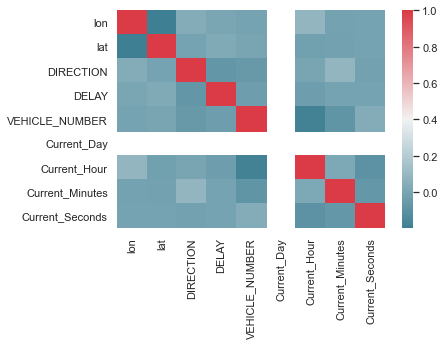

In [429]:
seaborn.set(style='white')
cmap = seaborn.diverging_palette(220, 10, as_cmap=True)
seaborn.heatmap(df.corr(),cmap=cmap)

In [430]:
def LabelEncoding(col):
    encoder = LabelEncoder()
    encoder.fit(df[col])
    list(encoder.classes_)
    return encoder.transform(df[col])

def KBinsDiscretizing(currCol):
    discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
    discretizer.fit(df[currCol])
    return discretizer.transform(df[currCol])

df['Current_Stop_Encoded']=LabelEncoding('Current_Stop')
df['lon_Encoded']=LabelEncoding('lon')
df['lat_Encoded']=LabelEncoding('lat')
df['Current_Seconds_Encoded']=LabelEncoding('Current_Seconds')
df['Current_Minutes_Encoded']=LabelEncoding('Current_Minutes')
df['Current_Hour_Encoded']= LabelEncoding('Current_Hour')
df['Current_Day_Encoded']= LabelEncoding('Current_Day')
df['DIRECTION_Encoded']= LabelEncoding('DIRECTION')
df['RouteNumber_Encoded'] = LabelEncoding('ROUTE_NUMBER')

In [431]:
df.head(5)

,lon,lat,ROUTE_NUMBER,DIRECTION,Current_Stop,DELAY,VEHICLE_NUMBER,Current_Day,Current_Hour,Current_Minutes,Current_Seconds,Current_Stop_Encoded,lon_Encoded,lat_Encoded,Current_Seconds_Encoded,Current_Minutes_Encoded,Current_Hour_Encoded,Current_Day_Encoded,DIRECTION_Encoded,RouteNumber_Encoded
0,21.25036,48.98171,1,1,Železničná stanica,-37,737,10,12,14,22,230,832,229,14,14,0,0,1,1
1,21.24403,48.99333,2,0,Divadlo Jonáša Záborského,-50,739,10,12,14,22,17,617,551,14,14,0,0,0,11
2,21.25522,48.97044,10,1,Košická,-96,396,10,12,15,7,65,909,77,5,15,0,0,1,2
3,21.23688,49.01166,45,1,Pod Skalkou,-61,359,10,12,15,7,127,414,976,5,15,0,0,1,33
4,21.25696,49.01065,7,1,Ľubochnianska,4,735,10,12,16,22,213,948,936,14,16,0,0,1,37


In [357]:
df = df.drop(['Current_Stop','Current_Hour','Current_Minutes',
              'Current_Seconds','lon','lat',
              'PLANNED_ROAD','REAL_ROAD',
              'Current_Time','DIRECTION','ROUTE_NUMBER',
              'Current_Day'],axis =1, errors='ignore')

In [358]:
df.head(5)

,DELAY,VEHICLE_NUMBER,Current_Stop_Encoded,lon_Encoded,lat_Encoded,Current_Seconds_Encoded,Current_Minutes_Encoded,Current_Hour_Encoded,Current_Day_Encoded,DIRECTION_Encoded,RouteNumber_Encoded
0,-37,737,230,832,229,14,14,0,0,1,1
1,-50,739,17,617,551,14,14,0,0,0,11
2,-96,396,65,909,77,5,15,0,0,1,2
3,-61,359,127,414,976,5,15,0,0,1,33
4,4,735,213,948,936,14,16,0,0,1,37


In [359]:
corr = df.corr()#Lists all pairs of highly collinear variables
indices = np.where(corr > 0.3)
indices = [(corr.columns[x], corr.columns[y]) for x, y in zip(*indices)
                                        if x != y and x < y]
indices

[]

In [360]:
corr = df.corr()#Lists all pairs of highly collinear variables
indices = np.where(corr < -0.3)
indices = [(corr.columns[x], corr.columns[y]) for x, y in zip(*indices)
                                        if x != y and x < y]
indices

[]

In [361]:
#df = df.drop(['lon_Encoded'],axis =1, errors='ignore')

,DELAY,VEHICLE_NUMBER,Current_Stop_Encoded,lon_Encoded,lat_Encoded,Current_Seconds_Encoded,Current_Minutes_Encoded,Current_Hour_Encoded,Current_Day_Encoded,DIRECTION_Encoded,RouteNumber_Encoded
0,-37,737,230,832,229,14,14,0,0,1,1
1,-50,739,17,617,551,14,14,0,0,0,11
2,-96,396,65,909,77,5,15,0,0,1,2
3,-61,359,127,414,976,5,15,0,0,1,33
4,4,735,213,948,936,14,16,0,0,1,37
5,-8,3433,69,49,508,14,16,0,0,1,9
6,-42,745,183,125,904,5,17,0,0,1,29
7,-11,736,93,623,536,32,19,0,0,1,35
8,4,354,28,378,785,5,22,0,0,1,21
9,22,744,104,100,848,5,22,0,0,1,27


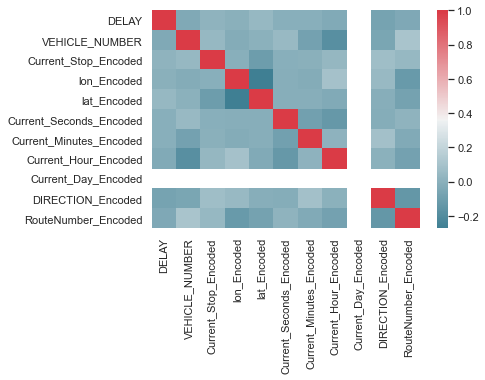

In [362]:
seaborn.heatmap(df.corr(),cmap=cmap)
df.head(10)

#### TrainTest Spit

In [363]:
train_x, test_x, train_y, test_y = train_test_split(df.drop('DELAY', axis=1), df['DELAY'], test_size=0.3, random_state=1234)

In [364]:
print(train_x.shape +  test_x.shape)

(1714, 10, 735, 10)


In [365]:
print(train_y.shape +  test_y.shape)

(1714, 735)


In [366]:
print(train_x.info()) 
print(test_x.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1714 entries, 1443 to 723
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   VEHICLE_NUMBER           1714 non-null   int64
 1   Current_Stop_Encoded     1714 non-null   int32
 2   lon_Encoded              1714 non-null   int64
 3   lat_Encoded              1714 non-null   int64
 4   Current_Seconds_Encoded  1714 non-null   int64
 5   Current_Minutes_Encoded  1714 non-null   int64
 6   Current_Hour_Encoded     1714 non-null   int64
 7   Current_Day_Encoded      1714 non-null   int64
 8   DIRECTION_Encoded        1714 non-null   int64
 9   RouteNumber_Encoded      1714 non-null   int32
dtypes: int32(2), int64(8)
memory usage: 133.9 KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 735 entries, 526 to 2366
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----


### Models

#### GridSearch for RandomForest

In [367]:
startTimeGS = datetime.now()
param_grid = {'n_estimators': [10,15,20,25,100,500,600,700,800,900,1000]}

grid_rf = GridSearchCV(RandomForestRegressor(), param_grid, cv=10)
grid_rf.fit(train_x, train_y)
bestModel = grid_rf.best_estimator_
bestParameters = grid_rf.best_params_
gridScores = grid_rf.score
print('Random forest Grid Search with non-redundant variables took [', datetime.now() - startTimeGS, '] seconds.')

Random forest Grid Search with non-redundant variables took [ 0:15:18.587309 ] seconds.


In [368]:
print(bestModel)
print(bestParameters)
gridScores

RandomForestRegressor(n_estimators=500)
{'n_estimators': 500}


<bound method BaseSearchCV.score of GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid={'n_estimators': [10, 15, 20, 25, 100, 500, 600, 700,
                                          800, 900, 1000]})>

In [369]:
regr = RandomForestRegressor(n_estimators = bestParameters.get('n_estimators'),
                             random_state = 1234)
regr.fit(train_x, train_y)
folds = KFold(n_splits = 10, shuffle = True, random_state = 1234)
scores = cross_val_score(regr, df.drop('DELAY', axis=1), df['DELAY'], cv=folds,scoring='r2')
y_pred = cross_val_predict(regr, df.drop('DELAY', axis=1), df['DELAY'], cv=folds)
print(scores.mean())
print(scores.std())
print(scores)


y_pred_Random_Forrest = regr.predict(test_x)
regr.score(test_x,test_y)

0.3464071733034179
0.22415121160841925
[ 0.1211977   0.39815411  0.66746318  0.49770351  0.1179407   0.30152122
  0.30233582  0.56668669 -0.06914432  0.56021313]


0.4374792175158345

In [370]:
y_true=test_y
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_true, y_pred_Random_Forrest))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_true, y_pred_Random_Forrest))
print('Root Mean Squared Error (RMSE):', metrics.mean_squared_error(y_true, y_pred_Random_Forrest, squared=False))
print('Explained Variance Score:', metrics.explained_variance_score(y_true, y_pred_Random_Forrest))
print('Max Error:', metrics.max_error(y_true, y_pred_Random_Forrest))
print('Median Absolute Error:', metrics.median_absolute_error(y_true, y_pred_Random_Forrest))
print('R^2:', metrics.r2_score(y_true, y_pred_Random_Forrest))

Mean Absolute Error (MAE): 57.60514829931973
Mean Squared Error (MSE): 10121.405504108843
Root Mean Squared Error (RMSE): 100.60519620829156
Explained Variance Score: 0.43750412668223204
Max Error: 1336.158
Median Absolute Error: 36.684
R^2: 0.4374792175158345


<AxesSubplot:title={'center':'Residuals'}, xlabel='DELAY', ylabel='DELAY'>

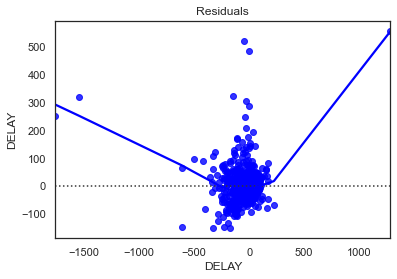

In [371]:
y_pred= y_pred_Random_Forrest
residuals = test_y - y_pred
plt.title('Residuals')
sns.residplot(x=test_y, y=residuals, lowess=True, color="blue")

Text(0.5, 1.0, 'Actual vs predicted')

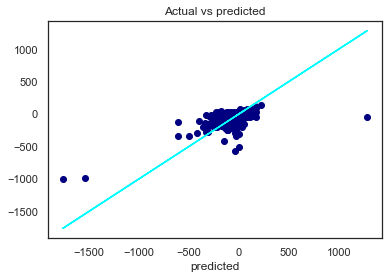

In [372]:
y_pred= regr.predict(test_x)
residuals = test_y - y_pred
plt.scatter(x=test_y, y=y_pred,color = 'navy')
plt.plot(test_y, test_y,color = 'cyan')
plt.xlabel('Actual')
plt.xlabel('predicted')
plt.title('Actual vs predicted')

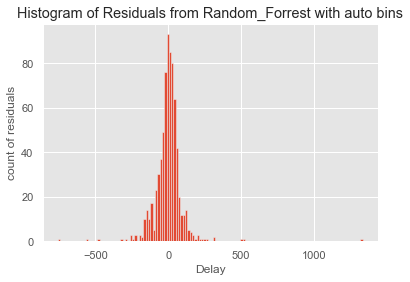

In [373]:
plt.style.use('ggplot')
plt.ylabel('count of residuals')
plt.xlabel('Delay')
plt.hist(residuals, bins='auto')
plt.title("Histogram of Residuals from Random_Forrest with auto bins")
plt.show()

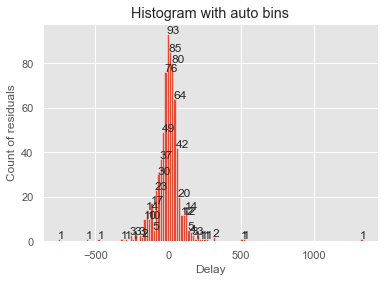

In [374]:
plt.style.use('ggplot')
plt.ylabel('Count of residuals')
plt.xlabel('Delay')
plt.title("Histogram with auto bins")
density, bins, _ = plt.hist(residuals, bins='auto')
count, _ = np.histogram(residuals, bins)
for x,y,num in zip(bins, density, count):
    if num != 0:
        plt.text(x, y+0.05, num, fontsize=12, rotation=0) # x,y,str

#### GridSearch for Linear Regression

In [375]:
param_grid = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True,False]}
grid_search = GridSearchCV(LinearRegression(), param_grid, cv = 10)
grid_search.fit(train_x, train_y)

bestModel = grid_search.best_estimator_
bestParameters = grid_search.best_params_
gridScores = grid_search.score
print(bestModel)
print(bestParameters)
gridScores

LinearRegression(fit_intercept=False, normalize=True)
{'copy_X': True, 'fit_intercept': False, 'normalize': True}


<bound method BaseSearchCV.score of GridSearchCV(cv=10, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'normalize': [True, False]})>

In [376]:
regressor = LinearRegression(fit_intercept=bestParameters.get('fit_intercept'),
                             normalize=bestParameters.get('normalize'), 
                             copy_X=bestParameters.get('copy_X'))  
regressor.fit(train_x, train_y)
folds = KFold(n_splits = 10, shuffle = True, random_state = 1234)
scores = cross_val_score(regressor, df.drop('DELAY', axis=1), df['DELAY'], cv=folds,scoring='r2')
y_pred = cross_val_predict(regressor, df.drop('DELAY', axis=1), df['DELAY'], cv=folds)
print(scores.mean())
print(scores.std())
print(scores)


y_pred_Linear_Regression = regressor.predict(test_x)
regressor.score(test_x,test_y)

-0.033196781480207126
0.046465343488724255
[-0.11408195 -0.02309961 -0.00388893 -0.11672926  0.00725003  0.00220283
 -0.03721935  0.01808032 -0.06028437 -0.00419754]


-0.03876884941445624

In [377]:
y_pred= y_pred_Linear_Regression
y_true=test_y
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_true, y_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_true, y_pred))
print('Root Mean Squared Error (RMSE):', metrics.mean_squared_error(y_true, y_pred, squared=False))
print('Explained Variance Score:', metrics.explained_variance_score(y_true, y_pred))
print('Max Error:', metrics.max_error(y_true, y_pred))
print('Median Absolute Error:', metrics.median_absolute_error(y_true, y_pred))
print('R^2:', metrics.r2_score(y_true, y_pred))

Mean Absolute Error (MAE): 77.96403596710873
Mean Squared Error (MSE): 18690.510781717196
Root Mean Squared Error (RMSE): 136.71324289079385
Explained Variance Score: -0.038249283104409226
Max Error: 1687.0910421285694
Median Absolute Error: 57.73687909190157
R^2: -0.03876884941445624


<AxesSubplot:title={'center':'Residuals'}, xlabel='DELAY', ylabel='DELAY'>

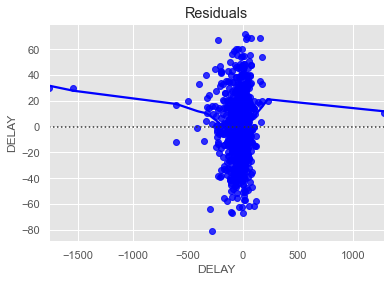

In [378]:
residuals = test_y - y_pred
plt.title('Residuals')
sns.residplot(x=test_y, y=residuals, lowess=True, color="blue")

Text(0.5, 1.0, 'Actual vs predicted')

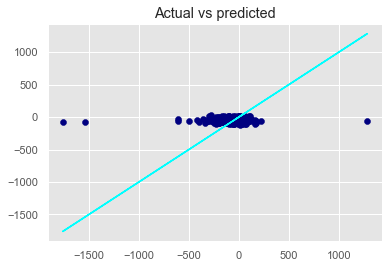

In [379]:
y_pred= regressor.predict(test_x)
residuals = test_y - y_pred
plt.scatter(x=test_y, y=y_pred,color = 'navy')
plt.plot(test_y, test_y,color = 'cyan')
plt.title('Actual vs predicted')

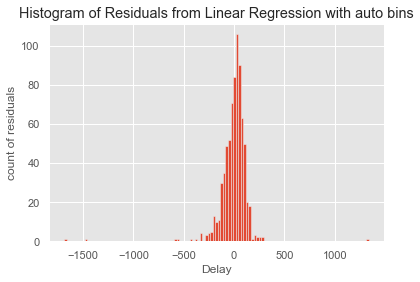

In [380]:
plt.style.use('ggplot')
plt.ylabel('count of residuals')
plt.xlabel('Delay')
plt.hist(residuals, bins='auto')
plt.title("Histogram of Residuals from Linear Regression with auto bins")
plt.show()

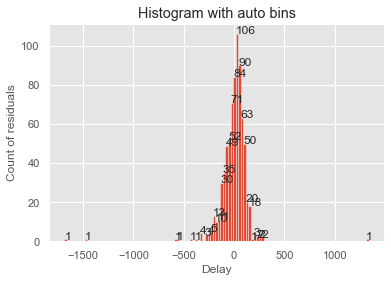

In [381]:
plt.style.use('ggplot')
plt.ylabel('Count of residuals')
plt.xlabel('Delay')
plt.title("Histogram with auto bins")
density, bins, _ = plt.hist(residuals, bins='auto')
count, _ = np.histogram(residuals, bins)
for x,y,num in zip(bins, density, count):
    if num != 0:
        plt.text(x, y+0.05, num, fontsize=12, rotation=0) # x,y,str

#### GridsearchCV for SVR

In [382]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.001, 0.01, 10, 100], 'gamma' : [0.001, 0.01, 0.1, 0.001]}
grid_search = GridSearchCV(SVR(), param_grid, cv = 10)
grid_search.fit(train_x, train_y)

bestModel = grid_search.best_estimator_
bestParameters = grid_search.best_params_
gridScores = grid_search.score
print(bestModel)
print(bestParameters)
gridScores

SVR(C=100, gamma=0.001)
{'C': 100, 'gamma': 0.001}


<bound method BaseSearchCV.score of GridSearchCV(cv=10, estimator=SVR(),
             param_grid={'C': [0.001, 0.01, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 0.001]})>

#### SVR

In [383]:
svr_rbf = SVR(kernel='rbf', 
              C=bestParameters.get('C'),
              gamma=bestParameters.get('gamma'), epsilon=1)
svr_rbf.fit(train_x, train_y)
folds = KFold(n_splits = 10, shuffle = True, random_state = 1234)
scores = cross_val_score(svr_rbf, df.drop('DELAY', axis=1), df['DELAY'], cv=folds,scoring='r2')
y_pred = cross_val_predict(svr_rbf, df.drop('DELAY', axis=1), df['DELAY'], cv=folds)
print(scores.mean())
print(scores.std())
print(scores)
y_pred_svr = svr_rbf.predict(test_x)
svr_rbf.score(test_x,test_y)

0.013617204025705255
0.05174543629271368
[ 0.03185612  0.04192177 -0.07714348  0.02321539 -0.00449725 -0.02662068
  0.09393635 -0.0396832   0.09074255  0.00244447]


-0.025128674619670832

In [384]:
y_pred= y_pred_svr
y_true=test_y
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_true, y_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_true, y_pred))
print('Root Mean Squared Error (RMSE):', metrics.mean_squared_error(y_true, y_pred, squared=False))
print('Explained Variance Score:', metrics.explained_variance_score(y_true, y_pred))
print('Max Error:', metrics.max_error(y_true, y_pred))
print('Median Absolute Error:', metrics.median_absolute_error(y_true, y_pred))
print('R^2:', metrics.r2_score(y_true, y_pred))

Mean Absolute Error (MAE): 71.96194776275965
Mean Squared Error (MSE): 18445.083866759018
Root Mean Squared Error (RMSE): 135.8126793298734
Explained Variance Score: -0.006915502102068816
Max Error: 1781.9597275959532
Median Absolute Error: 49.19705980288143
R^2: -0.025128674619670832


<AxesSubplot:title={'center':'Residuals'}, xlabel='DELAY', ylabel='DELAY'>

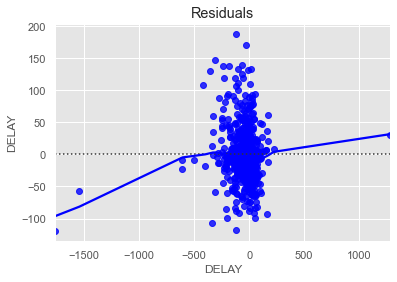

In [385]:
residuals = test_y - y_pred
plt.title('Residuals')
sns.residplot(x=test_y, y=residuals, lowess=True, color="blue")

Text(0.5, 1.0, 'Actual vs predicted')

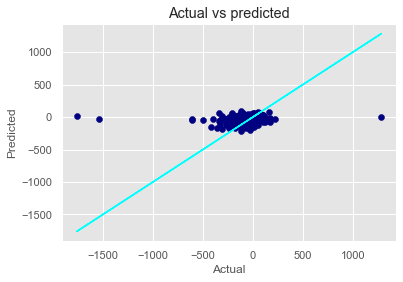

In [386]:
y_pred= svr_rbf.predict(test_x)
residuals = test_y - y_pred
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.scatter(x=test_y, y=y_pred,color = 'navy')
plt.plot(test_y, test_y,color = 'cyan')
plt.title('Actual vs predicted')

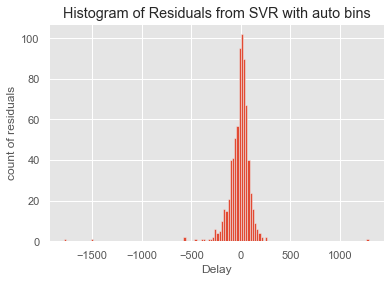

In [387]:
plt.style.use('ggplot')
plt.ylabel('count of residuals')
plt.xlabel('Delay')
plt.hist(residuals, bins='auto')
plt.title("Histogram of Residuals from SVR with auto bins")
plt.show()

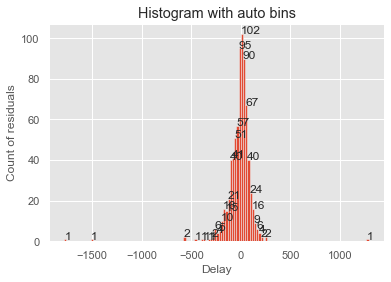

In [388]:
plt.style.use('ggplot')
plt.ylabel('Count of residuals')
plt.xlabel('Delay')
plt.title("Histogram with auto bins")
density, bins, _ = plt.hist(residuals, bins='auto')
count, _ = np.histogram(residuals, bins)
for x,y,num in zip(bins, density, count):
    if num != 0:
        plt.text(x, y+0.05, num, fontsize=12, rotation=0) # x,y,str

#### GridSearch for XGBoost model

In [389]:
param_grid = {'max_depth' : [1,2,3,4,5,6,7,8,9,10],
              'n_estimators': [10,15,20,25,100,500,600,700,800,900,1000]
             }
grid_search = GridSearchCV(xgb.XGBRegressor(objective ='reg:squarederror'), param_grid, cv = 10)
grid_search.fit(train_x, train_y)

bestModel = grid_search.best_estimator_
bestParameters = grid_search.best_params_
gridScores = grid_search.score
print(bestModel)
print(bestParameters)
gridScores

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=3,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=600, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)
{'max_depth': 3, 'n_estimators': 600}


<bound method BaseSearchCV.score of GridSearchCV(cv=10,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                              

#### XGBoost model

In [390]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', 
                          colsample_bytree = 0.8, 
                          learning_rate = 1,
                          max_depth = bestParameters.get('max_depth'), 
                          alpha = 10, 
                          n_estimators = bestParameters.get('n_estimators'))
xg_reg.fit(train_x,train_y)
folds = KFold(n_splits = 10, shuffle = True, random_state = 1234)
scores= cross_val_score(xg_reg, df.drop('DELAY', axis=1), df['DELAY'], cv=folds,scoring='r2')
y_pred = cross_val_predict(xg_reg, df.drop('DELAY', axis=1), df['DELAY'], cv=folds)
print(scores.mean())
print(scores.std())
print(scores)

preds_y = xg_reg.predict(test_x)
rmse = np.sqrt(mean_squared_error(test_y, preds_y))
print(xg_reg.score(test_x,test_y))

0.3206871942708842
0.37023826093031825
[-0.41949097  0.42168769  0.69875377  0.1909663   0.43576592  0.65792961
  0.05358304  0.61321583 -0.15012595  0.7045867 ]
0.2781235346777432


In [391]:
y_pred= preds_y
y_true=test_y
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_true, y_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_true, y_pred))
print('Root Mean Squared Error (RMSE):', metrics.mean_squared_error(y_true, y_pred, squared=False))
print('Explained Variance Score:', metrics.explained_variance_score(y_true, y_pred))
print('Max Error:', metrics.max_error(y_true, y_pred))
print('Median Absolute Error:', metrics.median_absolute_error(y_true, y_pred))
print('R^2:', metrics.r2_score(y_true, y_pred))

Mean Absolute Error (MAE): 76.94975507855415
Mean Squared Error (MSE): 12988.683541847624
Root Mean Squared Error (RMSE): 113.96790575353933
Explained Variance Score: 0.27846112202537343
Max Error: 1395.849998474121
Median Absolute Error: 57.93309783935547
R^2: 0.2781235346777432


<AxesSubplot:title={'center':'Residuals'}, xlabel='DELAY', ylabel='DELAY'>

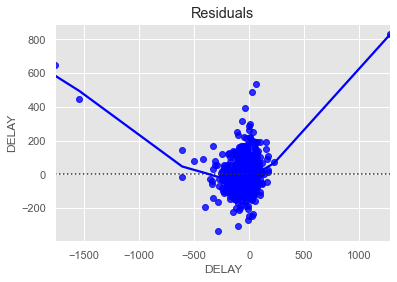

In [392]:
residuals = test_y - y_pred
plt.title('Residuals')
sns.residplot(x=test_y, y=residuals, lowess=True, color="blue")

Text(0.5, 1.0, 'Actual vs predicted')

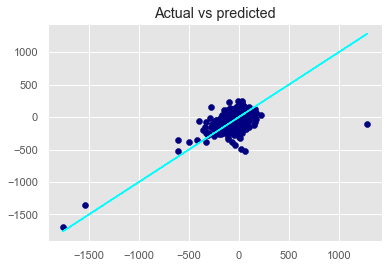

In [393]:
y_pred= xg_reg.predict(test_x)
residuals = test_y - y_pred
plt.scatter(x=test_y, y=y_pred,color = 'navy')
plt.plot(test_y, test_y,color = 'cyan')
plt.title('Actual vs predicted')

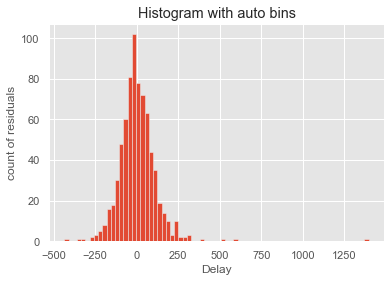

In [394]:
plt.style.use('ggplot')
plt.ylabel('count of residuals')
plt.xlabel('Delay')
plt.hist(residuals, bins='auto')
plt.title("Histogram with auto bins")
plt.show()

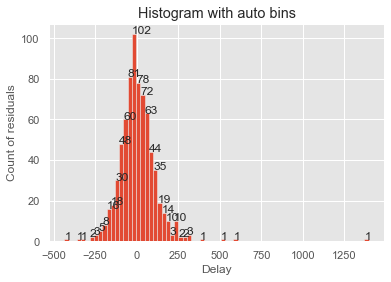

In [395]:
plt.style.use('ggplot')
plt.ylabel('Count of residuals')
plt.xlabel('Delay')
plt.title("Histogram with auto bins")
density, bins, _ = plt.hist(residuals, bins='auto')
count, _ = np.histogram(residuals, bins)
for x,y,num in zip(bins, density, count):
    if num != 0:
        plt.text(x, y+0.05, num, fontsize=12, rotation=0) # x,y,str

#### GridSearch for DecisionTree

In [396]:
startTimeGS = datetime.now()
param_grid = {'criterion':['mse', 'friedman_mse', 'mae'],
              'splitter':['best','random']}

grid_rf = GridSearchCV(DecisionTreeRegressor(random_state =  0), param_grid, cv=10)
grid_rf.fit(train_x, train_y)
bestModel = grid_rf.best_estimator_
bestParameters = grid_rf.best_params_
gridScores = grid_rf.score
print('MLPRegressor Grid Search with non-redundant variables took [', datetime.now() - startTimeGS, '] seconds.')

MLPRegressor Grid Search with non-redundant variables took [ 0:00:08.256398 ] seconds.


In [397]:
print(bestModel)
print(bestParameters)
gridScores

DecisionTreeRegressor(criterion='friedman_mse', random_state=0)
{'criterion': 'friedman_mse', 'splitter': 'best'}


<bound method BaseSearchCV.score of GridSearchCV(cv=10, estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'criterion': ['mse', 'friedman_mse', 'mae'],
                         'splitter': ['best', 'random']})>

#### DecisionTree

In [398]:
regr = DecisionTreeRegressor(criterion = bestParameters.get('criterion'),
                             splitter = bestParameters.get('splitter'))
regr.fit(train_x, train_y)
folds = KFold(n_splits = 10, shuffle = True, random_state = 1234)
scores = cross_val_score(regr, df.drop('DELAY', axis=1), df['DELAY'], cv=folds,scoring='r2')
y_pred = cross_val_predict(regr, df.drop('DELAY', axis=1), df['DELAY'], cv=folds)
print(scores.mean())
print(scores.std())
print(scores)


y_pred_svr = regr.predict(test_x)
regr.score(test_x,test_y)

-0.023936528750638963
0.46420737894918
[ 0.19379799  0.21122918  0.64853883  0.12991388 -0.17125066  0.34111105
  0.08431682 -0.37309683 -1.15138934 -0.15253622]


0.25344450460304935

In [399]:
y_pred= y_pred_svr
y_true=test_y
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_true, y_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_true, y_pred))
print('Root Mean Squared Error (RMSE):', metrics.mean_squared_error(y_true, y_pred, squared=False))
print('Explained Variance Score:', metrics.explained_variance_score(y_true, y_pred))
print('Max Error:', metrics.max_error(y_true, y_pred))
print('Median Absolute Error:', metrics.median_absolute_error(y_true, y_pred))
print('R^2:', metrics.r2_score(y_true, y_pred))

Mean Absolute Error (MAE): 66.14421768707483
Mean Squared Error (MSE): 13432.731972789115
Root Mean Squared Error (RMSE): 115.89966338514152
Explained Variance Score: 0.2536232166749184
Max Error: 1298.0
Median Absolute Error: 41.0
R^2: 0.25344450460304935


<AxesSubplot:title={'center':'Residuals'}, xlabel='DELAY', ylabel='DELAY'>

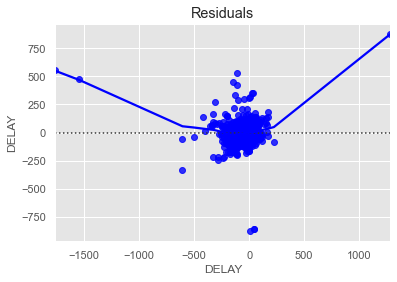

In [400]:
residuals = test_y - y_pred
plt.title('Residuals')
sns.residplot(x=test_y, y=residuals, lowess=True, color="blue")

Text(0.5, 1.0, 'Actual vs predicted')

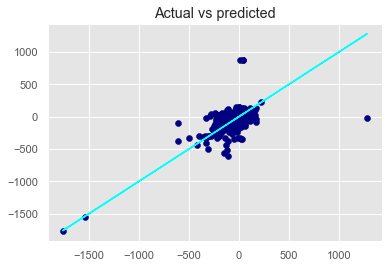

In [401]:
y_pred= regr.predict(test_x)
residuals = test_y - y_pred
plt.scatter(x=test_y, y=y_pred,color = 'navy')
plt.plot(test_y, test_y,color = 'cyan')
plt.title('Actual vs predicted')

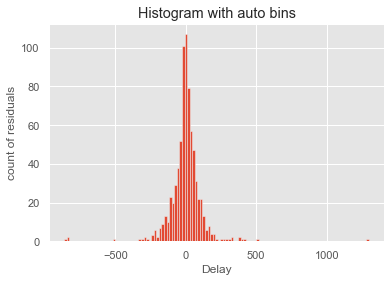

In [402]:
plt.style.use('ggplot')
plt.ylabel('count of residuals')
plt.xlabel('Delay')
plt.hist(residuals, bins='auto')
plt.title("Histogram with auto bins")
plt.show()

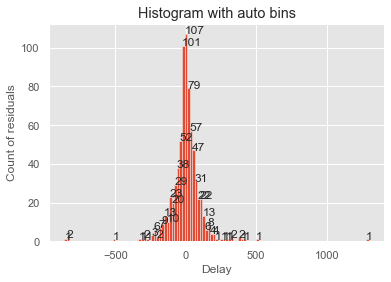

In [403]:
plt.style.use('ggplot')
plt.ylabel('Count of residuals')
plt.xlabel('Delay')
plt.title("Histogram with auto bins")
density, bins, _ = plt.hist(residuals, bins='auto')
count, _ = np.histogram(residuals, bins)
for x,y,num in zip(bins, density, count):
    if num != 0:
        plt.text(x, y+0.05, num, fontsize=12, rotation=0) # x,y,str